In [1]:
# this is a comment i Julia
# in Julia everything is an Expression 

In [2]:
2 + 3

5

In [3]:
# variables don't have to be explicitely typed
a = 2
typeof(a)

Int64

In [4]:
# Julia supports ASCII strings
str = "Harris"

"Harris"

In [5]:
typeof(str)

ASCIIString

In [6]:
# and UTF8 / UTF16 strings
str2 = "öäüß"

"öäüß"

In [7]:
typeof(str2)

UTF8String

In [8]:
# both string types are immutable 
# and their individual characters should not be accessed by index
# better use the iterator
for chr in str2
    println(chr)
end

ö
ä
ü
ß


In [9]:
typeof(str2)

UTF8String

In [10]:
# This is a 'tuple'
a_tuple = (1,"VALUE")

(1,"VALUE")

In [11]:
typeof(a_tuple)

Tuple{Int64,ASCIIString}

In [12]:
# arrays are easy to create
array = [0,1,2,3,4]

5-element Array{Int64,1}:
 0
 1
 2
 3
 4

In [13]:
# and their index starts with 1!
array[1]

0

In [14]:
# Julia can also generate arrays by following certain conditions
# Here we define a range from 1 to 20 with step 2 (this is an expression, too)
generated_array = 1:2:20

10-element StepRange{Int64,Int64}:
 1,3,5,7,9,11,13,15,17,19

In [15]:
generated_array[3]

5

In [16]:
# this is another way to create arrays by using 'comprehensions'
another_array = [arr for arr in 1:10]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [17]:
# Crreating matrices is very easy and can be done by using semicolons as separators between rows
matrix = [1 2 3 4; 
          5 6 7 8; 
          9 10 11 12]

3x4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [18]:
# Of course, Julia supports Conditionals like if..then..else
if 2 > 3
    println("WAT?")
elseif 2 < 2
    println("WOOT?")
else
    println("Hello, world!")
end

Hello, world!


In [19]:
# ternary operator is also supported
a = 2 > 3 ? true : false 

false

In [20]:
# Julia's for-loop is very flexible and powerful
for x in 1:10
    println("Value is $x") # here we interpolate the string value
end

Value is 1
Value is 2
Value is 3
Value is 4
Value is 5
Value is 6
Value is 7
Value is 8
Value is 9
Value is 10


In [21]:
# and while loops too
a = 1
b = 10
    
while a < b
  a += 1
  println("$a: looping over")
end

2: looping over
3: looping over
4: looping over
5: looping over
6: looping over
7: looping over
8: looping over
9: looping over
10: looping over


In [22]:
# Julia's structures are very easy to access.
# Here we use 'enumerate' to return not only the current value
# but also the index itself
# The returned value we call a 'tuple' and we show it via @show macro
for (i, v) in enumerate(1:10)
    @show (i, v)
end

(i,v) = (1,1)
(i,v) = (2,2)
(i,v) = (3,3)
(i,v) = (4,4)
(i,v) = (5,5)
(i,v) = (6,6)
(i,v) = (7,7)
(i,v) = (8,8)
(i,v) = (9,9)
(i,v) = (10,10)


In [ ]:
# To access the Julia documentation just prepend a question mark before the term your're searching for

In [23]:
?println

search: 

```rst
..  println(x)

Print (using :func:`print`) ``x`` followed by a newline.
```


println print_with_color print print_joined print_escaped



In [24]:
# functions are first-class objects
# Values are passed-by-reference
function doubleIt(num)
    num * 2
end

doubleIt (generic function with 1 method)

In [25]:
doubleIt(5)

10

In [26]:
# you don't have to use the return statement 
# because Julia automatically returns the result of the last expression in a function
# Remember: in Julia everything is an expression 
function doubleItWithRet(num)
    return num * 2
end

doubleItWithRet (generic function with 1 method)

In [27]:
doubleItWithRet(5)

10

In [28]:
# a function can also be written this way
# just like a variable definition
# but this applies only to short functions containing one expression
doubleIt(num) = num * 2

doubleIt (generic function with 1 method)

In [29]:
# you can be more specific and provide the parameter type information to Julia compiler
# Julia can deduce the type but it's often better to give this information in advance to 
# help the compiler generate more efficient code
# Julia uses LLVM to generate native code
doubleIt(num::Float64) = num * 2

doubleIt (generic function with 2 methods)

In [30]:
# now our "doubleIt" function can consume Int64 and Float64 values (which, of course, are not of the same type)
doubleIt(45.5)

91.0

In [31]:
# Functions can be returned
function returnAFun()
    aValue = 0
    return ((a) -> a += a) # we return a function that expects a single argument
end

returnAFun (generic function with 1 method)

In [32]:
returned_func = returnAFun()

(anonymous function)

In [33]:
value = returned_func(10)
println("Value is $value")

Value is 20


In [34]:
# Julia supports higher-order functions
function consumeAFun(func)
    func(5)
end

consumeAFun (generic function with 1 method)

In [35]:
# here we define a function (it's quite similar to 'lambdas' in Python, for example) 
toBeConsumed_ = (a) -> a * a

(anonymous function)

In [36]:
consumeAFun(toBeConsumed_)

25

In [37]:
# Functions can be anonymous...
# ...and they also can accept arbitrary amounts of arguments
# Just use the "splat" operator ... as a suffix
anonymous_func = function(manyargs...)
    println("Argument Type is: " * string(typeof(manyargs))) # here we use 'string' to convert returned value to a string
    for arg in manyargs
        println("Argument: $arg")
    end
end

(anonymous function)

In [38]:
anonymous_func(1,2,3,4,5,6)

Argument Type is: Tuple{Int64,Int64,Int64,Int64,Int64,Int64}
Argument: 1
Argument: 2
Argument: 3
Argument: 4
Argument: 5
Argument: 6


In [39]:
# Julia uses "mutiple dispatch" to call the most precise version of a function
# By using methods we can explore the available function definitions.
methods(doubleIt)

# 2 methods for generic function "doubleIt":
doubleIt(num::Float64) at In[29]:5
doubleIt(num) at In[28]:4

In [ ]:
# In other languages, especially the object-oriented ones, 
# a 'method' is a functions belonging to a certain instance of a class
# In Julia a 'method' belongs to a function
# Methods in Julia are different 'versions' of the same function 
# which have different signatures 

In [40]:
# Julia has no excessive class support like Java, C#, C++ etc.
# Instead it provides a simple type hierarchy without deep nesting

#Here we define an abstract class 
# Unlike in other OO-languages abstract classes don't have fields 
# and concrete types can't further be subtyped

abstract Device

# We subclass from Device by creating a new concrete type 'Computer'
type Computer <: Device
    name::AbstractString
    price::Float64
    peripherals::Array{AbstractString}
end

# To create an immutable type we simply replace 'type' with immutable
immutable iPad <: Device
    name::AbstractString
    price::Float64
end

# We can set some defaults for the type constructor, too
immutable iPhone <: Device
    name::AbstractString
    price::Float64
    iPhone(name="iPhone 6",price=700.00) = new(name,price)
end


In [41]:
iphone = iPhone()

iPhone("iPhone 6",700.0)

In [42]:
iphone.name

"iPhone 6"

In [43]:
# because we declared iPhone type to be immutable no changes are allowed
iphone.name = "iPhone 5"

LoadError: LoadError: type iPhone is immutable
while loading In[43], in expression starting on line 2

In [44]:
computer = Computer("DELL",1000.00,["mice","printer"])

Computer("DELL",1000.0,AbstractString["mice","printer"])

In [45]:
# The type 'Computer' is not immutable so changes are allowed
computer.name = "Lenovo"

"Lenovo"

In [46]:
# we can easily inspect the generated LLVM code
# the commands with a preceding @ are called 'macros'
@code_llvm doubleIt(45.5)


define double @julia_doubleIt_2202(double) {
top:
  %1 = fmul double %0, 2.000000e+00
  ret double %1
}


In [47]:
# or even the final, machine code
@code_native doubleIt(45.5)

	.text
Filename: In[29]
Source line: 5
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 5
	addsd	%xmm0, %xmm0
	popq	%rbp
	ret


In [48]:
# if you want to know how long it takes to execute a piece of code just prepend the @time macro
@time doubleIt(10)

  0.003504 seconds (456

20

 allocations: 56.759 KB)


In [49]:
# We can create our own macros, too.
# We define a macro with 'macro' keyword and
# declare the code block which will be expanded later
# by using 'quote'-'end' markers
# Don't forget to prepend $ before the inserted code (variable, expression etc.)
# Without $ Julia wouldn't expand the given code

macro injectIt(func)
    quote
        $func
    end
end

In [50]:
function addition(a::Int64,b::Int64)
    a + b
end

@injectIt addition(2,3)

5

In [51]:
# Julia is a 'homoiconic' language
# this means that it treats its code and data the same way
# With Julia one can access the AST (abstract syntax tree) directly
# This provides powerful instruments for metaprogramming (e.g. code that generates code)

# Here we define a function that will act as a "function generator".
# We iterate over a loop and generate a new piece of code that will be immediately 
# inserted into our running code. This means that during the execution of "funcgen"
# the same program will get a few more functions "injected". Therefore the
# 'return value' of 'funcgen' is the 'expansion' of our running program: it expands into
# new functions prefixed with 'mult_'. The amount of these new function depends on the 
# argument 'num' we provide to 'funcgen'
#
# The important part here is the macro @eval which reads the following code 

function funcgen(num::Int64)
    for count in 1:num
        println("Generating function no. $count")
        @eval function $(symbol(string("mult_",count)))(par::Int64)
                par * $count
             end
    end
end

funcgen (generic function with 1 method)

In [52]:
# Here, our function generator creates 10 new mult_-functions. 
funcgen(10)

Generating function no. 1
Generating function no. 2
Generating function no. 3
Generating function no. 4
Generating function no. 5
Generating function no. 6
Generating function no. 7
Generating function no. 8
Generating function no. 9
Generating function no. 10


In [53]:
# we execute one of them to check if the newly generated code is OK
mult_2(5)

10

In [54]:
# Julia's ecosystem contains many useful packages
# Here we load some of them
using DataFrames # A Julia implementation of DataFrames similar to R or Python
using RDatasets # this package is a port from R
using PyPlot    # this one is from Python

  likely near C:\Users\Harris\.julia\v0.5\RDatasets\src\dataset.jl:1
  likely near C:\Users\Harris\.julia\v0.5\RDatasets\src\dataset.jl:1
  likely near C:\Users\Harris\.julia\v0.5\RDatasets\src\datasets.jl:1


In [ ]:
# to update local package list use:
# Pkg.update()
# to initialize a new local package repository use:
# Pkg.init() # this is automatically done when calling Pkg.update() for the first time
# to add a new package use:
# Pkg.add(PACKAGE_NAME_IN_DOUBLE_QUOTES)
# to build a new package from source use:
# Pkg.build(PACKAGE_NAME_IN_DOUBLE_QUOTES)

In [55]:
# This is how we load a dataset from RDatasets package
# RDatasets brings many predefined datasets
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [56]:
# We get the complete list by calling 'datasets'
RDatasets.datasets()

,Package,Dataset,Title,Rows,Columns
1,COUNT,affairs,affairs,601,18
2,COUNT,azdrg112,azdrg112,1798,4
3,COUNT,azpro,azpro,3589,6
4,COUNT,badhealth,badhealth,1127,3
5,COUNT,fasttrakg,fasttrakg,15,9
6,COUNT,lbw,lbw,189,10
7,COUNT,lbwgrp,lbwgrp,6,7
8,COUNT,loomis,loomis,410,11
9,COUNT,mdvis,mdvis,2227,13
10,COUNT,medpar,medpar,1495,10


In [57]:
# With RDatasets we can work almost like in R environment
RDatasets.head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [58]:
# Here we group the species by their name 
# We use the 5-th row from the original dataset and count them by 'nrow'
by(iris, 5, nrow)

,Species,x1
1,setosa,50
2,versicolor,50
3,virginica,50


In [59]:
# Here's another well-known dataset: titanic
titanic = dataset("datasets","titanic")

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0
7,3rd,Female,Child,No,17
8,Crew,Female,Child,No,0
9,1st,Male,Adult,No,118
10,2nd,Male,Adult,No,154


In [60]:
by(titanic,3,nrow)

,Age,x1
1,Adult,16
2,Child,16


In [61]:
groupby(titanic,[1,2])

DataFrames.GroupedDataFrame  8 groups with keys: [1,2]
First Group:
4x5 DataFrames.SubDataFrame{Array{Int64,1}}
| Row | Class | Sex      | Age     | Survived | Freq |
|-----|-------|----------|---------|----------|------|
| 1   | "1st" | "Female" | "Child" | "No"     | 0    |
| 2   | "1st" | "Female" | "Adult" | "No"     | 4    |
| 3   | "1st" | "Female" | "Child" | "Yes"    | 1    |
| 4   | "1st" | "Female" | "Adult" | "Yes"    | 140  |
⋮
Last Group:
4x5 DataFrames.SubDataFrame{Array{Int64,1}}
| Row | Class  | Sex    | Age     | Survived | Freq |
|-----|--------|--------|---------|----------|------|
| 1   | "Crew" | "Male" | "Child" | "No"     | 0    |
| 2   | "Crew" | "Male" | "Adult" | "No"     | 670  |
| 3   | "Crew" | "Male" | "Child" | "Yes"    | 0    |
| 4   | "Crew" | "Male" | "Adult" | "Yes"    | 192  |

In [62]:
# DataArrays are similar to standard arrays 
# Additionally they accept NA values
da = @data [1,2,3,4,5,6,7,NA,8,9,10]

11-element DataArrays.DataArray{Int64,1}:
  1  
  2  
  3  
  4  
  5  
  6  
  7  
   NA
  8  
  9  
 10  

In [63]:
# DataFrames represent tabular structures and behave like their counterparts in R and Python
df = DataFrame(ID = 1:4, 
                FirstName = ["John","Mary","Christopher","Max"],
                LastName = ["Doe","Clarkson","Wishbone","Reynolds"], 
                EMail = ["john.doe@email.com","mary.clarkson@email.com","chris.wishbone@email.com","max.reynolds@email.com"])

,ID,FirstName,LastName,EMail
1,1,John,Doe,john.doe@email.com
2,2,Mary,Clarkson,mary.clarkson@email.com
3,3,Christopher,Wishbone,chris.wishbone@email.com
4,4,Max,Reynolds,max.reynolds@email.com


In [64]:
# Like in R and Python we can easily get out some useful information about the data structure
df.columns

4-element Array{Any,1}:
 [1,2,3,4]                                                                                                      
 ASCIIString["John","Mary","Christopher","Max"]                                                                 
 ASCIIString["Doe","Clarkson","Wishbone","Reynolds"]                                                            
 ASCIIString["john.doe@email.com","mary.clarkson@email.com","chris.wishbone@email.com","max.reynolds@email.com"]

In [65]:
describe(df)

ID
Min      1.0
1st Qu.  1.75
Median   2.5
Mean     2.5
3rd Qu.  3.25
Max      4.0
NAs      0
NA%      0.0%

FirstName
Length  4

In [66]:
# Just like with any other "standard" Julia type we can use 'show' to list the internals
show(df)


Type    ASCIIString
NAs     0
NA%     0.0%
Unique  4

LastName
Length  4
Type    ASCIIString
NAs     0
NA%     0.0%
Unique  4

EMail
Length  4
Type    ASCIIString
NAs     0
NA%     0.0%
Unique  4

4x4 DataFrames.DataFrame
| Row | ID | FirstName     | LastName   | EMail                      |
|-----|----|---------------|------------|----------------------------|
| 1   | 1  | "John"        | "Doe"      | "john.doe@email.com"       |
| 2   | 2  | "Mary"        | "Clarkson" | "mary.clarkson@email.com"  |
| 3   | 3  | "Christopher" | "Wishbone" | "chris.wishbone@email.com" |
| 4   | 4  | "Max"         | "Reynolds" | "max.reynolds@email.com"   |

In [67]:
# Gadfly is Julia's own implementation for handling graphics
using Gadfly

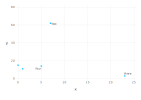

In [68]:
X = [1,7,23,5,0]
Y = [11,62,3,14,15]
Labels = ["one", "two", "three", "four", "five"]

Gadfly.plot(x=X, y=Y, label=Labels,Geom.point, Geom.label)

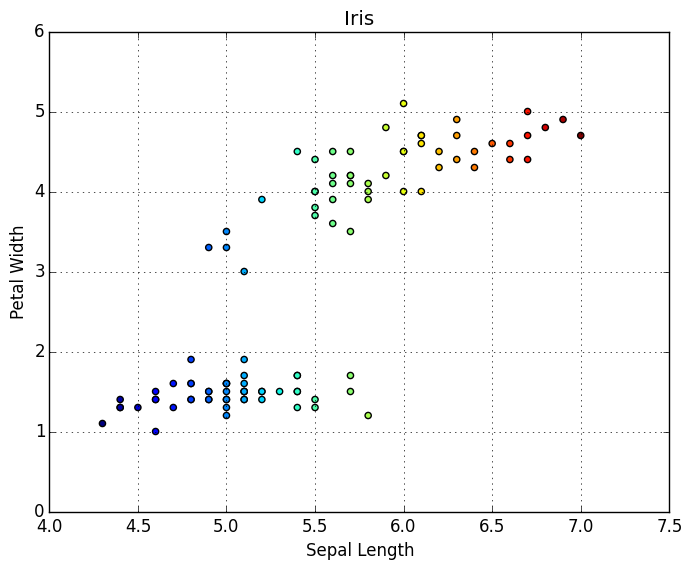

In [69]:
#PyPlot is a wrapper for Python's matplotlib

x = iris[1][1:100]
y = iris[3][1:100]
p = PyPlot.scatter(x,y, c=collect(x))
xlabel("Sepal Length")
ylabel("Petal Width")
title("Iris")
grid("on")